In [47]:
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
data.columns =['x1','x2','y']
data.head()

,x1,x2,y
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1


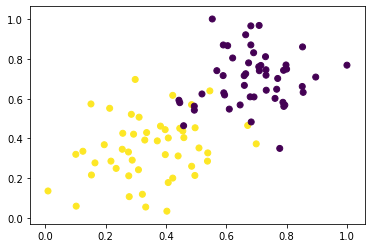

In [48]:
import matplotlib.pyplot as plt
plt.scatter(data['x1'], data['x2'] , c = data['y'])

In [49]:
X = np.array(data[['x1','x2']])
y = np.array(data['y'])

In [54]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [55]:
trainPerceptronAlgorithm(X,y)

[(array([-0.05239463]), array([-2.04919443])),
 (array([1.23772563]), array([-2.90815949])),
 (array([-39.47663703]), array([23.57864461])),
 (array([-13.50379588]), array([6.9383232])),
 (array([-11.04532818]), array([5.48635011])),
 (array([-9.98603021]), array([5.00161826])),
 (array([-9.09871965]), array([4.59558738])),
 (array([-8.40255162]), array([4.28747795])),
 (array([-7.79386694]), array([4.01808682])),
 (array([-7.2147601]), array([3.75179037])),
 (array([-6.74373497]), array([3.54387842])),
 (array([-6.32217403]), array([3.35780013])),
 (array([-5.91530766]), array([3.16978527])),
 (array([-5.57526865]), array([3.02008878])),
 (array([-5.26589868]), array([2.88389381])),
 (array([-4.96487397]), array([2.74410039])),
 (array([-4.70772687]), array([2.63119489])),
 (array([-4.47090408]), array([2.52721318])),
 (array([-4.2520876]), array([2.4311375])),
 (array([-4.03812197]), array([2.33103038])),
 (array([-3.85091497]), array([2.24905015])),
 (array([-3.67642841]), array([2.